In [328]:
# import all the files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [329]:
ta = pd.read_csv('Trip_advisor_review.csv')

In [330]:
ta

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [331]:
#check value count
ta.Rating.value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [332]:
# check if there is any null
ta.isna().sum()[ta.isna().sum() > 0]

Series([], dtype: int64)

In [333]:
ta.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [334]:
ta.rename(columns={'Review':'x', 'Rating':'y'}, inplace=True)

In [335]:
ta.head()

,x,y
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [336]:
#make all values of x column in lower
ta['x'] = ta['x'].str.lower()
ta['x']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: x, Length: 20491, dtype: object

In [337]:
# import all the stopwords & then remove all stopwords from x column
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [338]:
from nltk.corpus import stopwords
len(stopwords.words('english')) # just for information

198

In [339]:
# put all the stopwrods in l1 variable
l1 = list(stopwords.words('english'))

In [340]:
import re
import string
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def text_process(text):
    # Remove numbers with suffix (like 1st, 2nd, 3rd, 5th)
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)
    # Remove all other numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize words
    words = text.split()
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in l1]
    # Join back to string
    return ' '.join(words)

In [341]:
applied_text_process = ta['x'].apply(text_process)

In [342]:
# Here we importing imp feature for converting text data into numbers(vectors), this process we called vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [343]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
ta_fitted = tfidf.fit(applied_text_process)

In [344]:
# it means repeated word count
ta_fitted.vocabulary_

{'nice': 5576,
 'hotel': 3943,
 'expensive': 2769,
 'parking': 6163,
 'got': 3504,
 'good': 3411,
 'deal': 2104,
 'stay': 8514,
 'anniversary': 238,
 'arrived': 346,
 'late': 4681,
 'evening': 2681,
 'took': 9132,
 'advice': 111,
 'previous': 6613,
 'review': 7264,
 'valet': 9448,
 'check': 1429,
 'quick': 6769,
 'easy': 2501,
 'little': 4828,
 'disappointed': 2305,
 'nonexistent': 5752,
 'view': 9496,
 'room': 7380,
 'clean': 1539,
 'size': 8105,
 'bed': 737,
 'comfortable': 1710,
 'woke': 9864,
 'neck': 5527,
 'high': 3835,
 'pillow': 6338,
 'soundproof': 8257,
 'like': 4771,
 'heard': 3770,
 'music': 5477,
 'night': 5646,
 'morning': 5441,
 'loud': 5045,
 'bang': 531,
 'door': 2377,
 'opening': 6007,
 'closing': 1638,
 'hear': 3766,
 'people': 6233,
 'talking': 8868,
 'hallway': 3703,
 'maybe': 5262,
 'noisy': 5742,
 'neighbor': 5551,
 'aveda': 452,
 'bath': 593,
 'product': 6691,
 'touch': 9159,
 'taken': 8861,
 'advantage': 106,
 'staying': 8625,
 'longer': 4984,
 'location': 4902

In [345]:
len(ta_fitted.vocabulary_)

10000

In [346]:
X = ta_fitted.transform(applied_text_process)
Y = ta['y']

In [347]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_actual=train_test_split(X,Y,test_size=.2, random_state=42)

In [348]:
y_train.value_counts()

y
5    7264
4    4787
3    1752
2    1460
1    1129
Name: count, dtype: int64

In [349]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [350]:
pd.Series(y_train_res).value_counts()

y
5    7264
4    7264
3    7264
2    7264
1    7264
Name: count, dtype: int64

In [351]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

In [352]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [353]:
y_pred = rfc.predict(x_test)

In [354]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [355]:
cm = confusion_matrix(y_actual,y_pred)
cm

array([[ 192,   29,    7,   14,   50],
       [  78,   64,   31,   68,   92],
       [  16,   31,   76,  182,  127],
       [   9,   31,   57,  502,  653],
       [   3,   22,   17,  253, 1495]], dtype=int64)

In [356]:
accuracy_score(y_actual,y_pred)

0.5681873627714077

In [357]:
import matplotlib.pyplot as plt

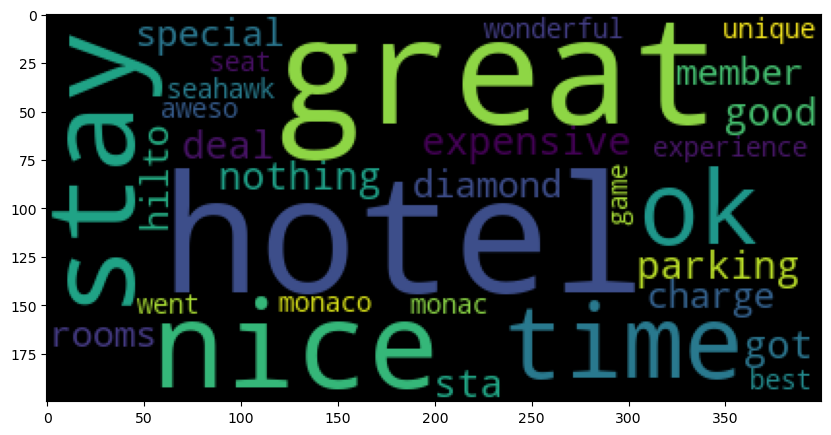

In [358]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=30).generate(str(ta['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)